In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [88]:
df = pd.read_csv('data_for_regression.csv')
df.head()

,x,y
0,0.000000,-inf
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184


In [89]:
df = df.iloc[1:]
df.head()

,x,y
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
5,0.125916,-3.672119


In [90]:
list = [df.iloc[i, 0] - df.iloc[i-1, 0] for i in range(1, len(df))]
step = sum(list)/len(list)

list2 = []
x = df.iloc[-1, 0]
while x <= 15.0:
    x = x + step
    list2.append(x)

df_forecast = pd.DataFrame({'x': np.array(list2)})
df_forecast.iloc[-1, 0] = 15
df_forecast

,x
0,12.591554
1,12.616737
2,12.641920
3,12.667103
4,12.692286
...,...
92,14.908400
93,14.933583
94,14.958766
95,14.983949


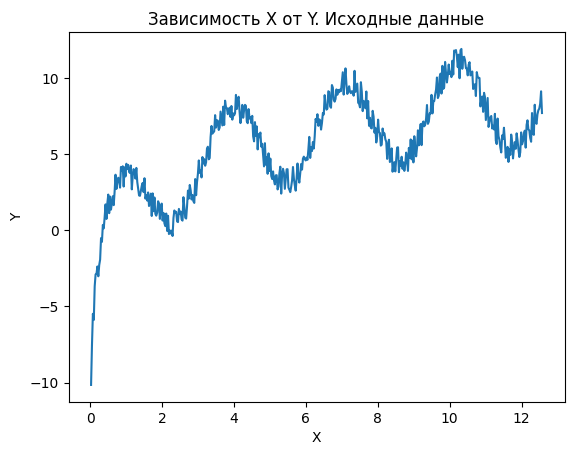

In [91]:
plt.plot(df['x'], df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Зависимость X от Y. Исходные данные')
plt.show()

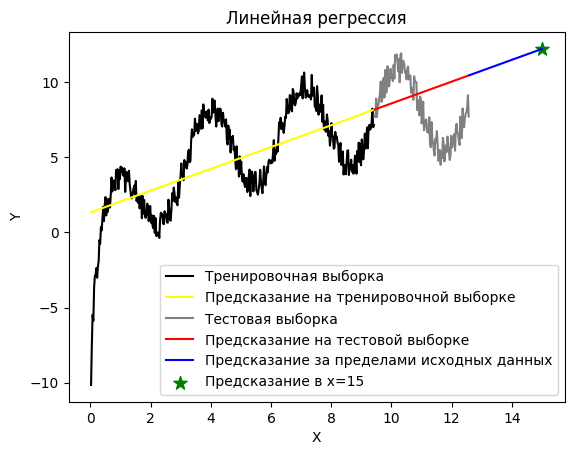

Среднеквадратичная ошибка на тренировочной выборке: 5.62
Среднеквадратичная ошибка на тестовой выборке: 7.96


In [92]:
features = ['x']
# Разбивка данных на тренировочную и тестовую части в отношении 75% на 25%
x_train = df.loc[:df.shape[0]*0.75, :][features]
x_test = df.loc[df.shape[0]*0.75:, :][features]
y_train = df.loc[:df.shape[0]*0.75, :]['y']
y_test = df.loc[df.shape[0]*0.75:, :]['y']

# Обучение модели на тренировочной датасете
lin = LinearRegression()
lin.fit(x_train, y_train)

# Расчет предсказаний для тренировочной, тестовой выборки, а также для прогнозного датасета
df_train_pred = lin.predict(x_train)
df_test_pred = lin.predict(x_test)
forecast = lin.predict(df_forecast)

#Построение графика
plt.plot(x_train['x'], y_train, c='black')
plt.plot(x_train['x'], df_train_pred, c='yellow')
plt.plot(x_test['x'], y_test, c='grey')
plt.plot(x_test['x'], df_test_pred, c='red')
plt.plot(df_forecast['x'], forecast, c = 'blue')
plt.scatter(15, forecast[-1], c='green', marker='*', s=100)
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Тренировочная выборка', 'Предсказание на тренировочной выборке',
            'Тестовая выборка', 'Предсказание на тестовой выборке',
            'Предсказание за пределами исходных данных', 'Предсказание в x=15'])
plt.show()
print(f'Среднеквадратичная ошибка на тренировочной выборке: {round(mean_squared_error(y_train, df_train_pred), 2)}')
print(f'Среднеквадратичная ошибка на тестовой выборке: {round(mean_squared_error(y_test, df_test_pred), 2)}')

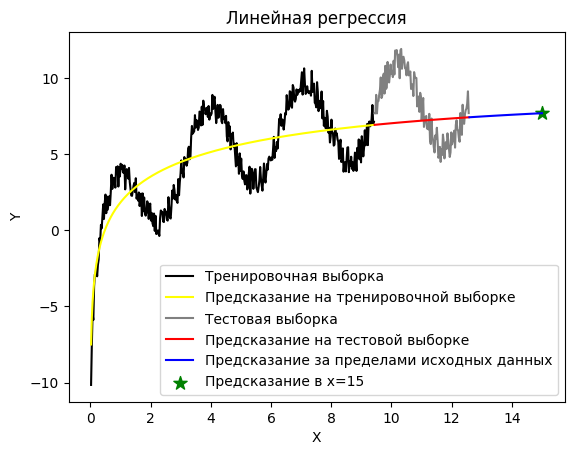

Среднеквадратичная ошибка на тренировочной выборке: 4.23
Среднеквадратичная ошибка на тестовой выборке: 5.76


In [93]:
# Генерация дополнительных признаков
df['x1'] = df['x'].apply(lambda x: np.log(x))
df_forecast['x1'] = df_forecast['x'].apply(lambda x: np.log(x))

features = ['x', 'x1']
# Разбивка данных на тренировочную и тестовую части в отношении 75% на 25%
x_train = df.loc[:df.shape[0]*0.75, :][features]
x_test = df.loc[df.shape[0]*0.75:, :][features]
y_train = df.loc[:df.shape[0]*0.75, :]['y']
y_test = df.loc[df.shape[0]*0.75:, :]['y']

# Обучение модели на тренировочной датасете
lin = LinearRegression()
lin.fit(x_train, y_train)

# Расчет предсказаний для тренировочной, тестовой выборки, а также для прогнозного датасета
df_train_pred = lin.predict(x_train)
df_test_pred = lin.predict(x_test)
forecast = lin.predict(df_forecast)

#Построение графика
plt.plot(x_train['x'], y_train, c='black')
plt.plot(x_train['x'], df_train_pred, c='yellow')
plt.plot(x_test['x'], y_test, c='grey')
plt.plot(x_test['x'], df_test_pred, c='red')
plt.plot(df_forecast['x'], forecast, c = 'blue')
plt.scatter(15, forecast[-1], c='green', marker='*', s=100)
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Тренировочная выборка', 'Предсказание на тренировочной выборке',
            'Тестовая выборка', 'Предсказание на тестовой выборке',
            'Предсказание за пределами исходных данных', 'Предсказание в x=15'])
plt.show()
print(f'Среднеквадратичная ошибка на тренировочной выборке: {round(mean_squared_error(y_train, df_train_pred), 2)}')
print(f'Среднеквадратичная ошибка на тестовой выборке: {round(mean_squared_error(y_test, df_test_pred), 2)}')

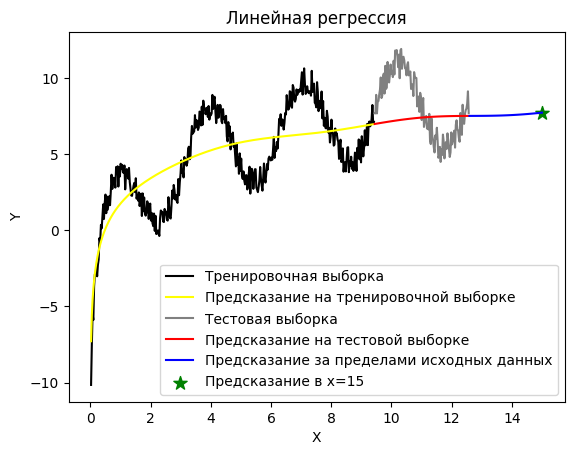

Среднеквадратичная ошибка на тренировочной выборке: 4.23
Среднеквадратичная ошибка на тестовой выборке: 5.51


In [94]:
# Генерация дополнительных признаков
df['x1'] = df['x'].apply(lambda x: np.log(x))
df['x2'] = df['x'].apply(lambda x: np.sin(x))

df_forecast['x1'] = df_forecast['x'].apply(lambda x: np.log(x))
df_forecast['x2'] = df_forecast['x'].apply(lambda x: np.sin(x))

features = ['x', 'x1', 'x2']
# Разбивка данных на тренировочную и тестовую части в отношении 75% на 25%
x_train = df.loc[:df.shape[0]*0.75, :][features]
x_test = df.loc[df.shape[0]*0.75:, :][features]
y_train = df.loc[:df.shape[0]*0.75, :]['y']
y_test = df.loc[df.shape[0]*0.75:, :]['y']

# Обучение модели на тренировочной датасете
lin = LinearRegression()
lin.fit(x_train, y_train)

# Расчет предсказаний для тренировочной, тестовой выборки, а также для прогнозного датасета
df_train_pred = lin.predict(x_train)
df_test_pred = lin.predict(x_test)
forecast = lin.predict(df_forecast)

#Построение графика
plt.plot(x_train['x'], y_train, c='black')
plt.plot(x_train['x'], df_train_pred, c='yellow')
plt.plot(x_test['x'], y_test, c='grey')
plt.plot(x_test['x'], df_test_pred, c='red')
plt.plot(df_forecast['x'], forecast, c = 'blue')
plt.scatter(15, forecast[-1], c='green', marker='*', s=100)
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Тренировочная выборка', 'Предсказание на тренировочной выборке',
            'Тестовая выборка', 'Предсказание на тестовой выборке',
            'Предсказание за пределами исходных данных', 'Предсказание в x=15'])
plt.show()
print(f'Среднеквадратичная ошибка на тренировочной выборке: {round(mean_squared_error(y_train, df_train_pred), 2)}')
print(f'Среднеквадратичная ошибка на тестовой выборке: {round(mean_squared_error(y_test, df_test_pred), 2)}')

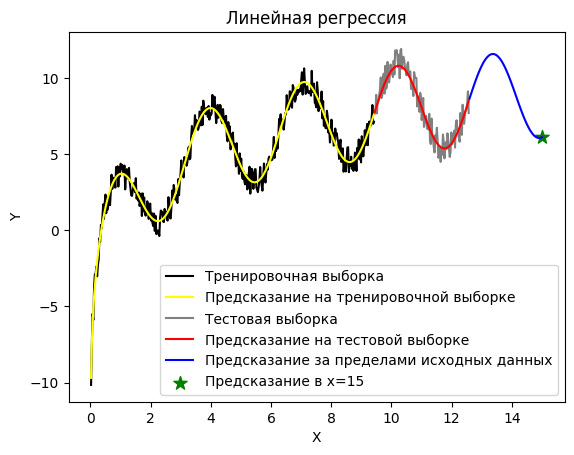

Среднеквадратичная ошибка на тренировочной выборке: 0.3
Среднеквадратичная ошибка на тестовой выборке: 0.38


In [95]:
# Генерация дополнительных признаков
df['x1'] = df['x'].apply(lambda x: np.log(x))
df['x2'] = df['x'].apply(lambda x: np.sin(x*2))

df_forecast['x1'] = df_forecast['x'].apply(lambda x: np.log(x))
df_forecast['x2'] = df_forecast['x'].apply(lambda x: np.sin(x*2))

features = ['x', 'x1', 'x2']
# Разбивка данных на тренировочную и тестовую части в отношении 75% на 25%
x_train = df.loc[:df.shape[0]*0.75, :][features]
x_test = df.loc[df.shape[0]*0.75:, :][features]
y_train = df.loc[:df.shape[0]*0.75, :]['y']
y_test = df.loc[df.shape[0]*0.75:, :]['y']

# Обучение модели на тренировочной датасете
lin = LinearRegression()
lin.fit(x_train, y_train)

# Расчет предсказаний для тренировочной, тестовой выборки, а также для прогнозного датасета
df_train_pred = lin.predict(x_train)
df_test_pred = lin.predict(x_test)
forecast = lin.predict(df_forecast)

#Построение графика
plt.plot(x_train['x'], y_train, c='black')
plt.plot(x_train['x'], df_train_pred, c='yellow')
plt.plot(x_test['x'], y_test, c='grey')
plt.plot(x_test['x'], df_test_pred, c='red')
plt.plot(df_forecast['x'], forecast, c = 'blue')
plt.scatter(15, forecast[-1], c='green', marker='*', s=100)
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Тренировочная выборка', 'Предсказание на тренировочной выборке',
            'Тестовая выборка', 'Предсказание на тестовой выборке',
            'Предсказание за пределами исходных данных', 'Предсказание в x=15'])
plt.show()
print(f'Среднеквадратичная ошибка на тренировочной выборке: {round(mean_squared_error(y_train, df_train_pred), 2)}')
print(f'Среднеквадратичная ошибка на тестовой выборке: {round(mean_squared_error(y_test, df_test_pred), 2)}')

In [96]:
df_forecast['forecast'] = forecast
df_forecast

,x,x1,x2,forecast
0,12.591554,2.533026,0.050345,8.640025
1,12.616737,2.535024,0.100562,8.792185
2,12.641920,2.537018,0.150524,8.943589
3,12.667103,2.539008,0.200105,9.093870
4,12.692286,2.540994,0.249178,9.242658
...,...,...,...,...
92,14.908400,2.701925,-0.999599,6.065617
93,14.933583,2.703613,-0.999757,6.070004
94,14.958766,2.705297,-0.997380,6.081773
95,14.983949,2.706980,-0.992474,6.100908


In [97]:
df_forecast.to_csv('df_forecast.csv')